Use iNNvestigate to traceback feature weights, than use this information to do clustering

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import time
import os
import pickle

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
matfile = '/Users/bogao/DataFiles/new landscape/data/all_bands_weight.pkl'
labelfile = '/Users/bogao/DataFiles/new landscape/data/all_bands_label.pkl'
with open(matfile, 'rb') as fmat, open(labelfile, 'rb') as flab:
    data = pickle.load(fmat)
    labels = pickle.load(flab)

### PCA

In [4]:
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(data)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

PCA done! Time elapsed: 3.248305082321167 seconds
Variance explained per principal component: [0.10561308 0.04873056 0.03037499 0.02497097 0.02147522 0.02039642
 0.01871201 0.01828519 0.01465996 0.01429465 0.01306085 0.01052653
 0.00979193 0.00946372 0.0090117  0.00866337 0.00865089 0.00825726
 0.00790154 0.00745009 0.00723024 0.00696983 0.00686113 0.00655268
 0.00644177 0.00627244 0.00609597 0.00595792 0.00577445 0.00569764
 0.0055922  0.00546565 0.00525424 0.00501651 0.00500144 0.00485891
 0.0048234  0.00460904 0.00438968 0.00423002 0.00417149 0.00403108
 0.00390446 0.00368678 0.00361245 0.00349062 0.00338228 0.00334709
 0.0032197  0.00314953]


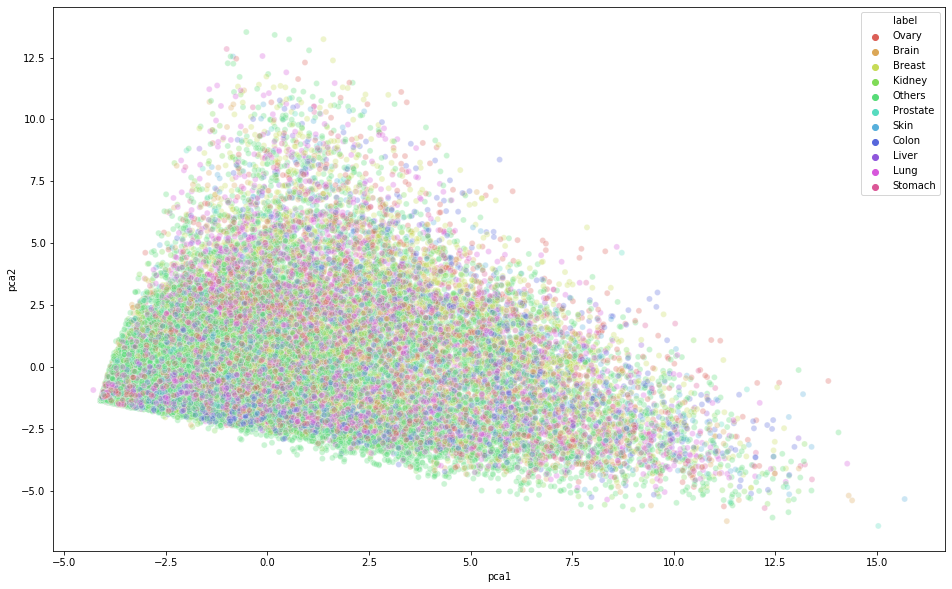

In [7]:
pca_df = pd.DataFrame(pca_result[:,:2], columns = ['pca1','pca2'])
pca_df['label'] = labels

plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="pca1", y="pca2",
    hue="label",
    palette=sns.color_palette("hls", np.unique(labels).shape[0]),
    data=pca_df,
    legend="full",
    alpha=0.3
)

### TSNE

In [8]:
RS = 1234
# TSNE
time_start = time.time()
pca_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 924.8936901092529 seconds


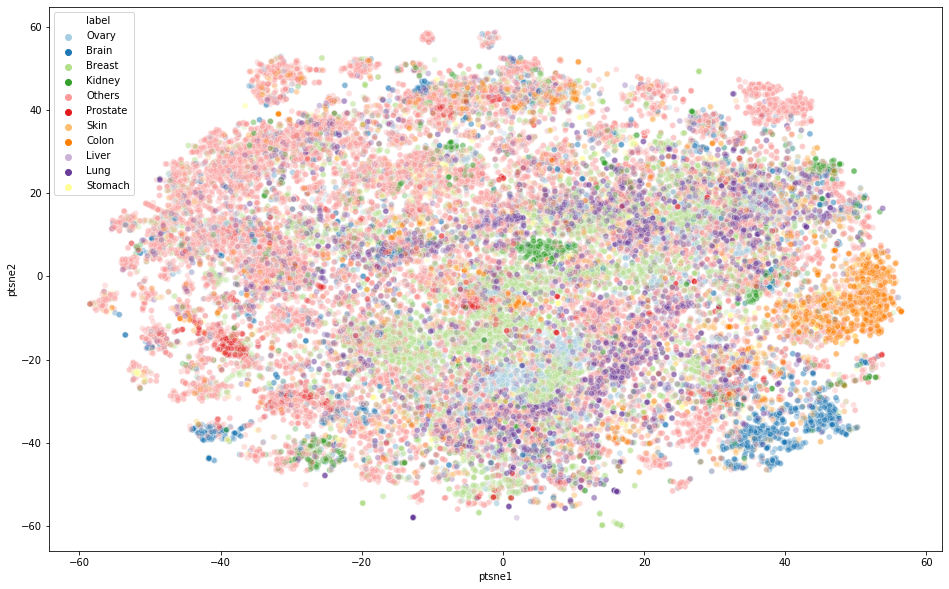

In [9]:
# plot
df = pd.DataFrame(pca_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = labels
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("Paired", len(set(labels))),
    data=df,
    legend="full",
    alpha=0.3
)

### Without others

In [11]:
dd = data[labels != 'Others']

In [12]:
RS = 1234

# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dd)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 1.6862659454345703 seconds
Cumulative explained variation for 50 principal components: 0.5560062777306121


In [13]:
# TSNE
time_start = time.time()
dd_tsne = TSNE(random_state=RS, perplexity=40).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 449.37667894363403 seconds


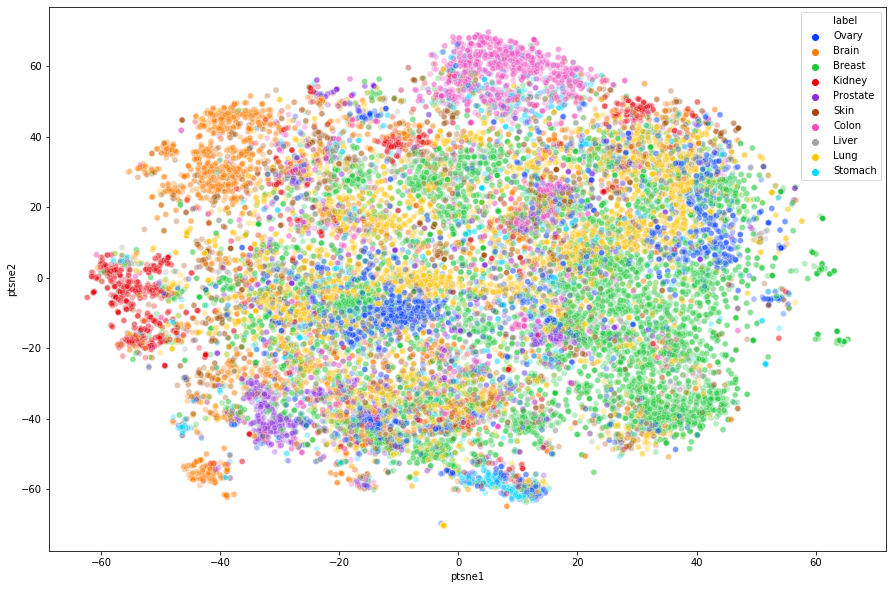

In [41]:
# plot
df = pd.DataFrame(dd_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = labels[labels != 'Others']
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(labels))-1),
    data=df,
    legend="full",
    alpha=0.3
)

### Keep only postive values

In [29]:
d1 = np.maximum(data, 0)

In [35]:
d1 = d1[labels != 'Others']

In [37]:
RS = 1234

# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(d1)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 1.455916166305542 seconds
Cumulative explained variation for 50 principal components: 0.45627374068692583


In [38]:
# TSNE
time_start = time.time()
d1_tsne = TSNE(random_state=RS, perplexity=40).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 511.17175126075745 seconds


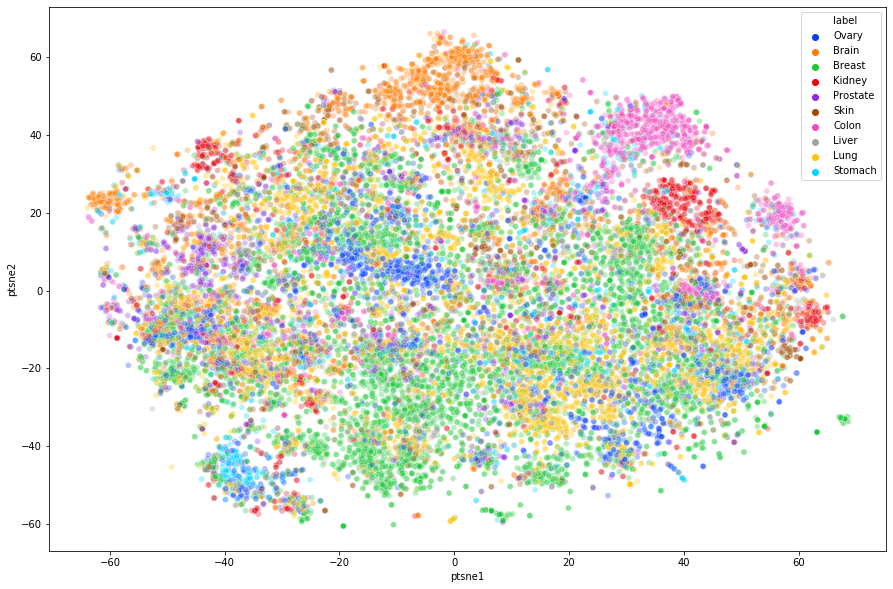

In [40]:
# plot
df = pd.DataFrame(d1_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = labels[labels != 'Others']
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(labels))-1),
    data=df,
    legend="full",
    alpha=0.3
)

#### Filter small weights

In [67]:
colsum = np.sum(d1, axis=0)/d1.shape[1]

In [43]:
d1.shape

(22777, 1622)

In [46]:
colsum.shape

(1622,)

In [54]:
len(colsum[colsum<100])

735

In [79]:
np.mean(colsum)

0.4611308285802863

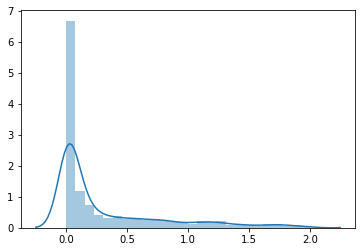

In [80]:
sns.distplot(colsum[colsum<=2])

In [81]:
d2 = d1[:,colsum>0.5]

In [82]:
d2.shape

(22777, 460)

#### Filtered weights

In [83]:
RS = 1234

# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(d2)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.4731299877166748 seconds
Cumulative explained variation for 50 principal components: 0.5295993810900049


In [84]:
# TSNE
time_start = time.time()
d2_tsne = TSNE(random_state=RS, perplexity=40).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 588.8035640716553 seconds


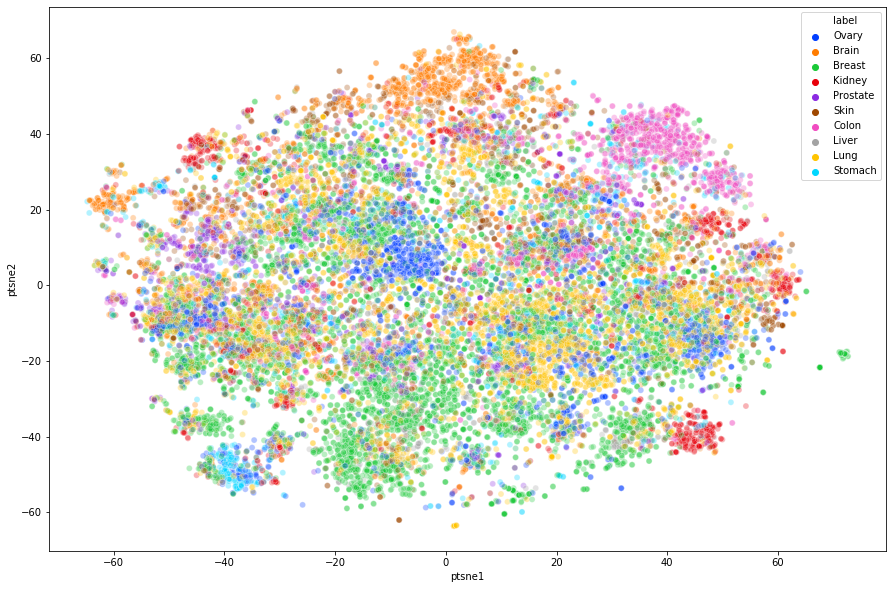

In [85]:
# plot
df = pd.DataFrame(d2_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = labels[labels != 'Others']
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(labels))-1),
    data=df,
    legend="full",
    alpha=0.3
)

### Disease labels

In [150]:
dlabelfile = '/Users/bogao/DataFiles/new landscape/data/all_bands_disease_label.pkl'
with open(dlabelfile, 'rb') as fi:
    disease_labels = pickle.load(fi)

### Cluster within sites

#### Brain

In [177]:
RS = 1234
dBrain = np.maximum(data, 0)
dBrain = dBrain[(labels == 'Brain') & (labels != 'None')]


In [178]:
dBrain_label = disease_labels[labels == 'Brain']
# dBrain_label = disease_labels[ (disease_labels != 'Others') & (disease_labels != 'None')]
# dBrain_label = disease_labels[labels == 'Brain']
dBrain_label = pd.Series(dBrain_label).str[:3].values

Unique labels and counts

In [179]:
unique_labels, unique_counts = np.unique(dBrain_label,return_counts=True)

Filter out small counts

In [180]:
unique_labels = unique_labels[unique_counts>10]
dBrain = dBrain[np.isin(dBrain_label, unique_labels)]
dBrain_label = dBrain_label[np.isin(dBrain_label, unique_labels)]

In [181]:
# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dBrain)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.20246291160583496 seconds
Cumulative explained variation for 50 principal components: 0.6226940722571084


In [182]:
# TSNE
time_start = time.time()
brain_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 24.060842990875244 seconds


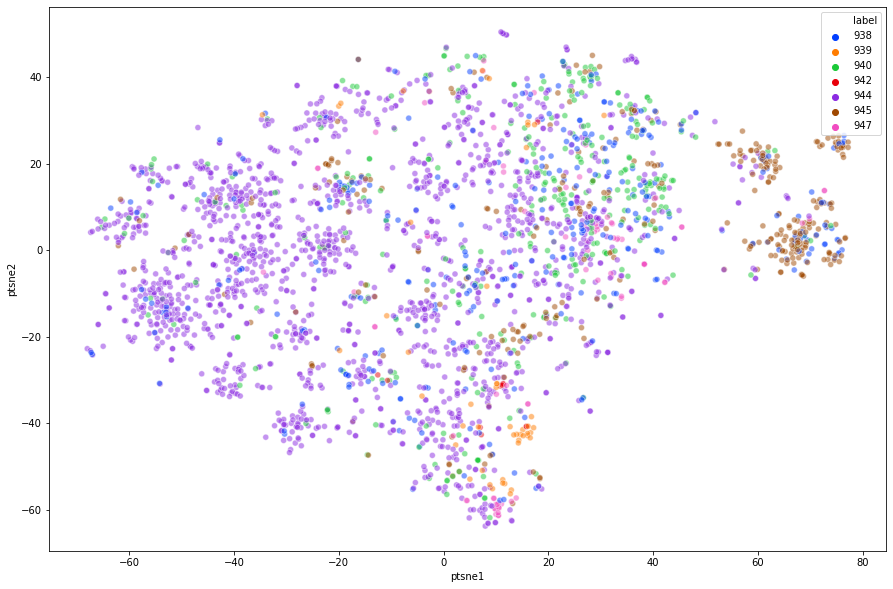

In [188]:
# plot
df = pd.DataFrame(brain_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = dBrain_label
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(dBrain_label))),
    data=df,
    legend="full",
    alpha=0.5
)


#### Ovary

In [207]:
RS = 1234
dOvary = np.maximum(data, 0)
dOvary = dOvary[labels == 'Ovary']

dOvary_label = disease_labels[labels == 'Ovary']

dOvary = dOvary[dOvary_label != 'None']
dOvary_label = dOvary_label[dOvary_label != 'None']
dOvary_label = pd.Series(dOvary_label).str[:3].values

unique_labels, unique_counts = np.unique(dOvary_label,return_counts=True)
unique_labels = unique_labels[unique_counts>10]
dOvary = dOvary[np.isin(dOvary_label, unique_labels)]
dOvary_label = dOvary_label[np.isin(dOvary_label, unique_labels)]

In [208]:
# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dOvary)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.1524810791015625 seconds
Cumulative explained variation for 50 principal components: 0.5027214417045912


In [209]:
# TSNE
time_start = time.time()
ovary_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 22.54712700843811 seconds


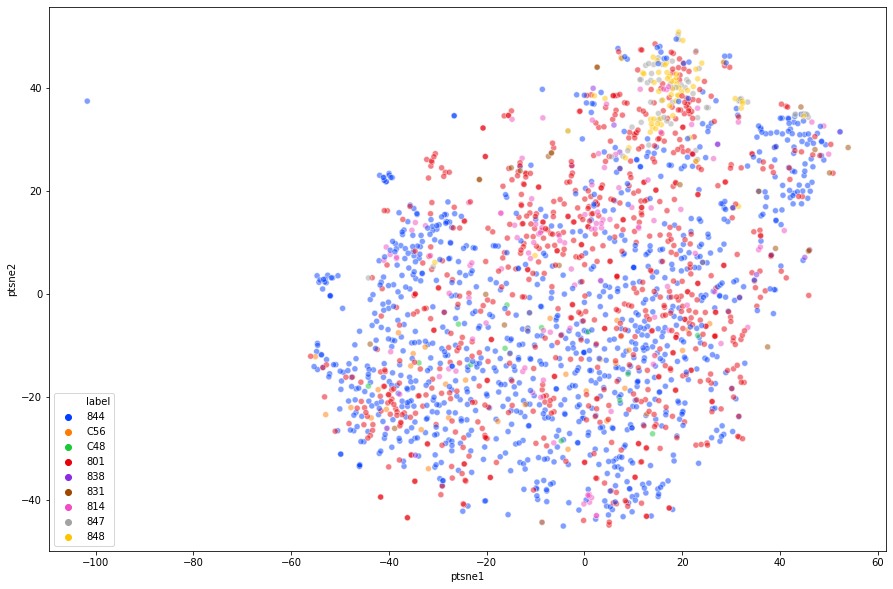

In [210]:
# plot
df = pd.DataFrame(ovary_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = dOvary_label
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(dOvary_label))),
    data=df,
    legend="full",
    alpha=0.5
)

#### Breast

In [215]:
RS = 1234
dBreast = np.maximum(data, 0)
dBreast = dBreast[labels == 'Breast']

dBreast_label = disease_labels[labels == 'Breast']

dBreast = dBreast[dBreast_label != 'None']
dBreast_label = dBreast_label[dBreast_label != 'None']
dBreast_label = pd.Series(dBreast_label).str[:4].values

unique_labels, unique_counts = np.unique(dBreast_label,return_counts=True)
unique_labels = unique_labels[unique_counts>10]
dBreast = dBreast[np.isin(dBreast_label, unique_labels)]
dBreast_label = dBreast_label[np.isin(dBreast_label, unique_labels)]

In [216]:
# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dBreast)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.3974590301513672 seconds
Cumulative explained variation for 50 principal components: 0.4833793176588569


In [217]:
# TSNE
time_start = time.time()
breast_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 60.99745202064514 seconds


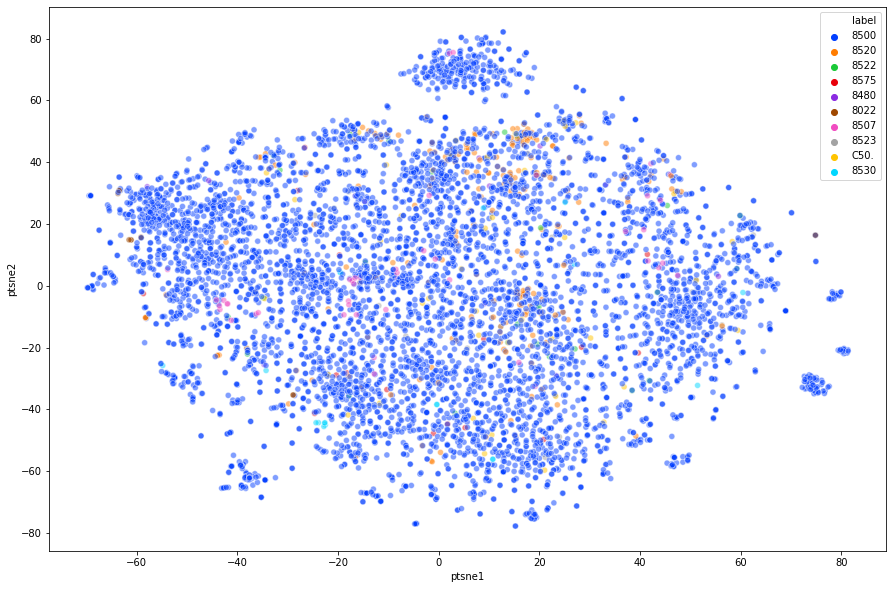

In [218]:
# plot
df = pd.DataFrame(breast_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = dBreast_label
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(dBreast_label))),
    data=df,
    legend="full",
    alpha=0.5
)

#### Kidney

In [219]:
RS = 1234
dKidney = np.maximum(data, 0)
dKidney = dKidney[labels == 'Kidney']

dKidney_label = disease_labels[labels == 'Kidney']

dKidney = dKidney[dKidney_label != 'None']
dKidney_label = dKidney_label[dKidney_label != 'None']
dKidney_label = pd.Series(dKidney_label).str[:4].values

unique_labels, unique_counts = np.unique(dKidney_label,return_counts=True)
unique_labels = unique_labels[unique_counts>10]
dKidney = dKidney[np.isin(dKidney_label, unique_labels)]
dKidney_label = dKidney_label[np.isin(dKidney_label, unique_labels)]

In [220]:
# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dKidney)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.12415790557861328 seconds
Cumulative explained variation for 50 principal components: 0.6670778124717542


In [221]:
# TSNE
time_start = time.time()
kidney_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 8.685090065002441 seconds


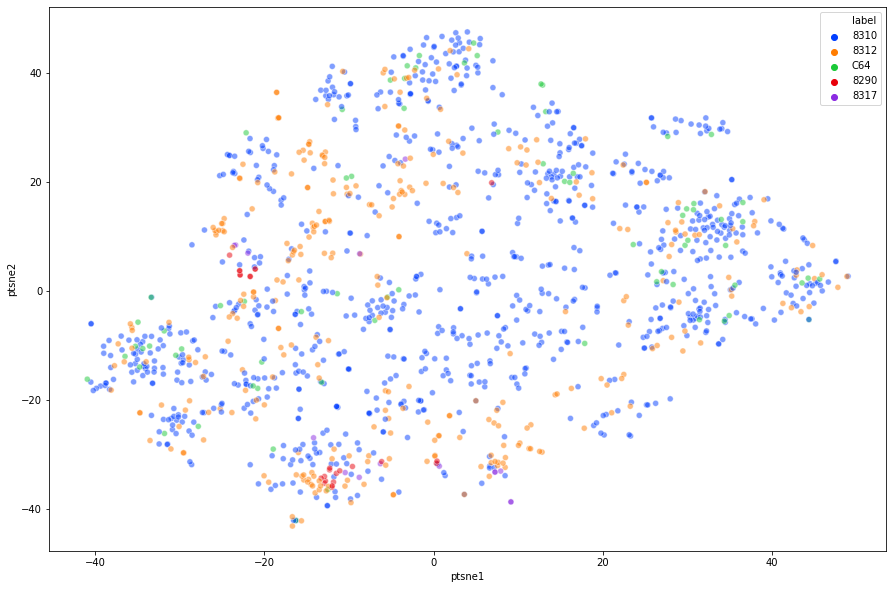

In [222]:
# plot
df = pd.DataFrame(kidney_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = dKidney_label
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(dKidney_label))),
    data=df,
    legend="full",
    alpha=0.5
)

#### Prostate

In [223]:
RS = 1234
dProstate = np.maximum(data, 0)
dProstate = dProstate[labels == 'Prostate']

dProstate_label = disease_labels[labels == 'Prostate']

dProstate = dProstate[dProstate_label != 'None']
dProstate_label = dProstate_label[dProstate_label != 'None']
dProstate_label = pd.Series(dProstate_label).str[:4].values

unique_labels, unique_counts = np.unique(dProstate_label,return_counts=True)
unique_labels = unique_labels[unique_counts>10]
dProstate = dProstate[np.isin(dProstate_label, unique_labels)]
dProstate_label = dProstate_label[np.isin(dProstate_label, unique_labels)]

In [224]:
# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dProstate)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.10060286521911621 seconds
Cumulative explained variation for 50 principal components: 0.6867891534642059


In [225]:
# TSNE
time_start = time.time()
prostate_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 8.418085098266602 seconds


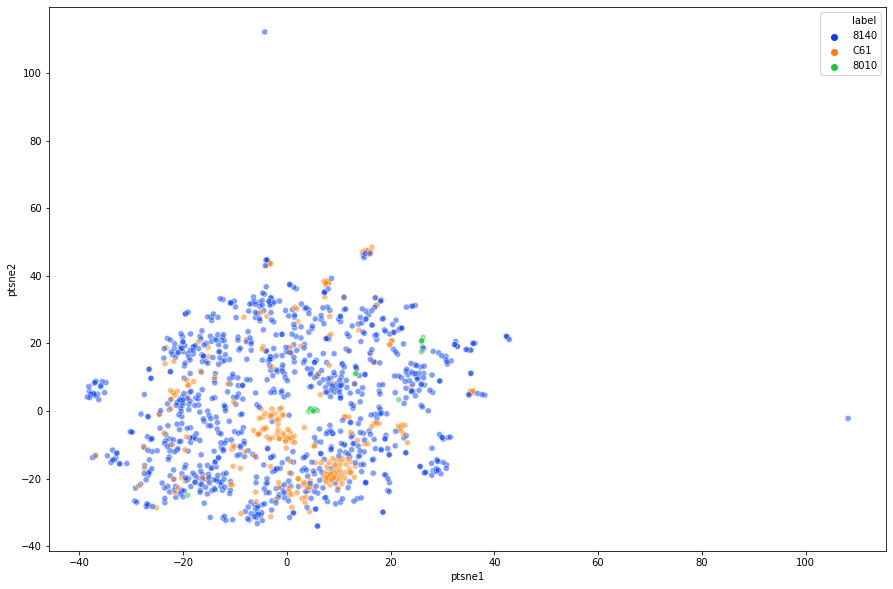

In [226]:
# plot
df = pd.DataFrame(prostate_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = dProstate_label
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(dProstate_label))),
    data=df,
    legend="full",
    alpha=0.5
)

#### Skin

In [227]:
RS = 1234
dSkin = np.maximum(data, 0)
dSkin = dSkin[labels == 'Skin']

dSkin_label = disease_labels[labels == 'Skin']

dSkin = dSkin[dSkin_label != 'None']
dSkin_label = dSkin_label[dSkin_label != 'None']
dSkin_label = pd.Series(dSkin_label).str[:4].values

unique_labels, unique_counts = np.unique(dSkin_label,return_counts=True)
unique_labels = unique_labels[unique_counts>10]
dSkin = dSkin[np.isin(dSkin_label, unique_labels)]
dSkin_label = dSkin_label[np.isin(dSkin_label, unique_labels)]

In [228]:
# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dSkin)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.08466315269470215 seconds
Cumulative explained variation for 50 principal components: 0.5925845159513531


In [229]:
# TSNE
time_start = time.time()
skin_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 9.912529945373535 seconds


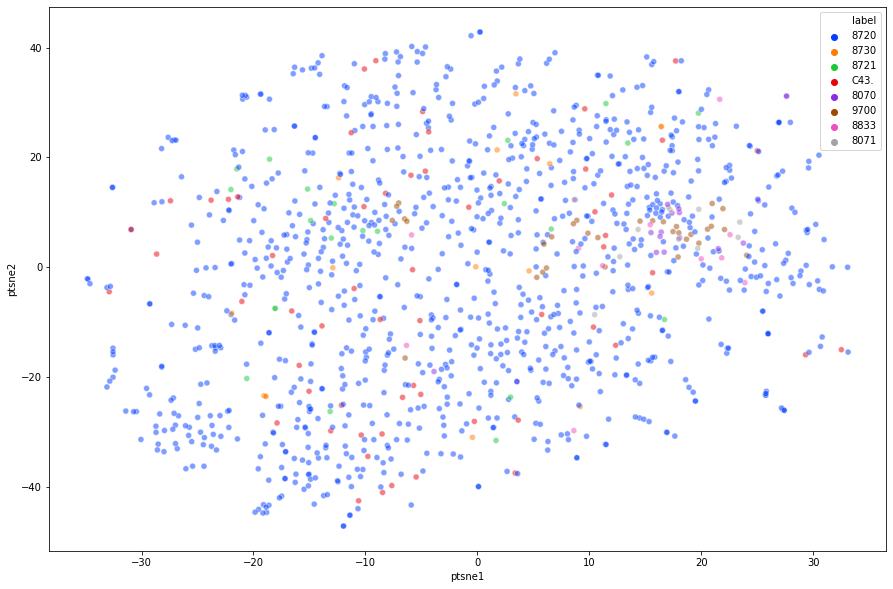

In [230]:
# plot
df = pd.DataFrame(skin_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = dSkin_label
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(dSkin_label))),
    data=df,
    legend="full",
    alpha=0.5
)

#### Colon

In [231]:
RS = 1234
dColon = np.maximum(data, 0)
dColon = dColon[labels == 'Colon']

dColon_label = disease_labels[labels == 'Colon']

dColon = dColon[dColon_label != 'None']
dColon_label = dColon_label[dColon_label != 'None']
dColon_label = pd.Series(dColon_label).str[:4].values

unique_labels, unique_counts = np.unique(dColon_label,return_counts=True)
unique_labels = unique_labels[unique_counts>10]
dColon = dColon[np.isin(dColon_label, unique_labels)]
dColon_label = dColon_label[np.isin(dColon_label, unique_labels)]

In [232]:
# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dColon)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.12881803512573242 seconds
Cumulative explained variation for 50 principal components: 0.6741802913119425


In [233]:
# TSNE
time_start = time.time()
colon_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 14.544146060943604 seconds


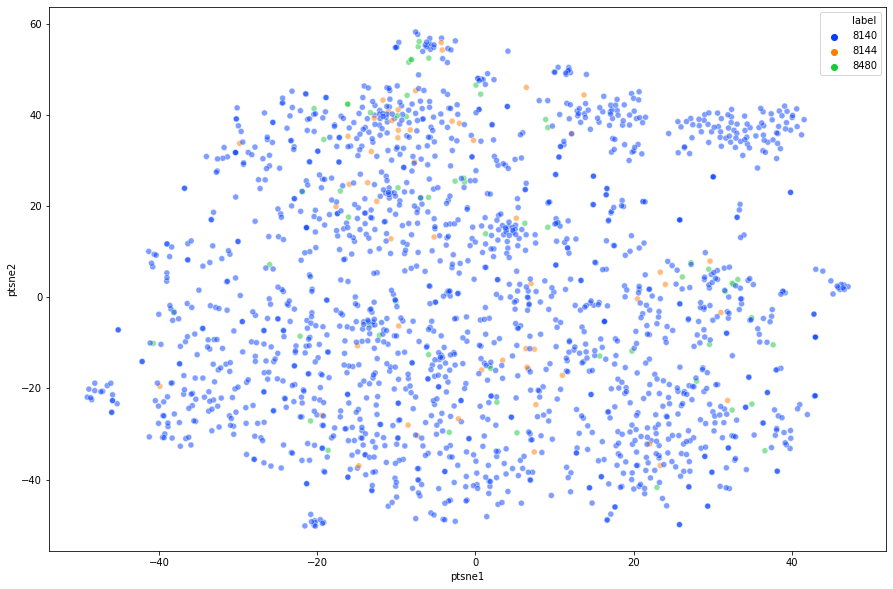

In [234]:
# plot
df = pd.DataFrame(colon_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = dColon_label
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(dColon_label))),
    data=df,
    legend="full",
    alpha=0.5
)

#### Liver

In [235]:
RS = 1234
dLiver = np.maximum(data, 0)
dLiver = dLiver[labels == 'Liver']

dLiver_label = disease_labels[labels == 'Liver']

dLiver = dLiver[dLiver_label != 'None']
dLiver_label = dLiver_label[dLiver_label != 'None']
dLiver_label = pd.Series(dLiver_label).str[:4].values

unique_labels, unique_counts = np.unique(dLiver_label,return_counts=True)
unique_labels = unique_labels[unique_counts>10]
dLiver = dLiver[np.isin(dLiver_label, unique_labels)]
dLiver_label = dLiver_label[np.isin(dLiver_label, unique_labels)]

In [236]:
# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dLiver)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.055055856704711914 seconds
Cumulative explained variation for 50 principal components: 0.6971589722140663


In [237]:
# TSNE
time_start = time.time()
liver_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 4.006823778152466 seconds


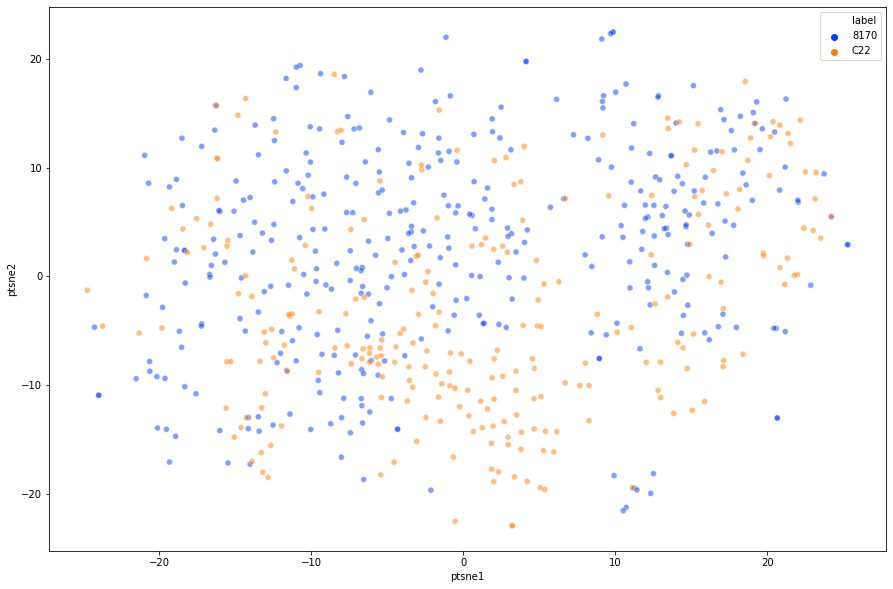

In [238]:
# plot
df = pd.DataFrame(liver_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = dLiver_label
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(dLiver_label))),
    data=df,
    legend="full",
    alpha=0.5
)

#### Lung

In [247]:
RS = 1234
dLung = np.maximum(data, 0)
dLung = dLung[labels == 'Lung']

dLung_label = disease_labels[labels == 'Lung']

dLung = dLung[dLung_label != 'None']
dLung_label = dLung_label[dLung_label != 'None']
dLung_label = pd.Series(dLung_label).str[:3].values

unique_labels, unique_counts = np.unique(dLung_label,return_counts=True)
unique_labels = unique_labels[unique_counts>10]
dLung = dLung[np.isin(dLung_label, unique_labels)]
dLung_label = dLung_label[np.isin(dLung_label, unique_labels)]

In [248]:
# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dLung)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.262462854385376 seconds
Cumulative explained variation for 50 principal components: 0.5159216637023816


In [249]:
# TSNE
time_start = time.time()
lung_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 39.58608889579773 seconds


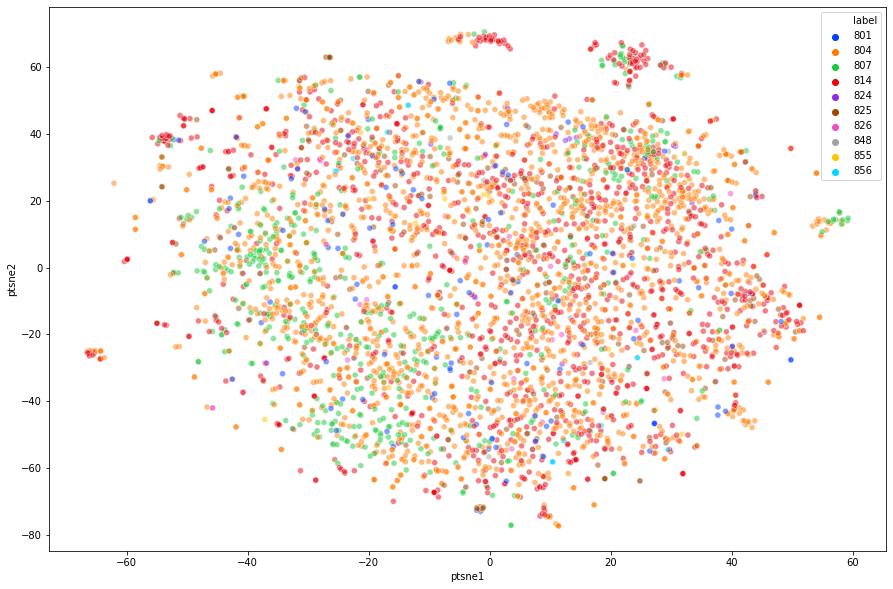

In [250]:
# plot
df = pd.DataFrame(lung_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = dLung_label
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(dLung_label))),
    data=df,
    legend="full",
    alpha=0.5
)

#### Stomach

In [266]:
RS = 1234
dStomach = np.maximum(data, 0)
dStomach = dStomach[labels == 'Stomach']

dStomach_label = disease_labels[labels == 'Stomach']

dStomach = dStomach[dStomach_label != 'None']
dStomach_label = dStomach_label[dStomach_label != 'None']
dStomach_label = pd.Series(dStomach_label).str[:3].values

unique_labels, unique_counts = np.unique(dStomach_label,return_counts=True)
unique_labels = unique_labels[unique_counts>10]
dStomach = dStomach[np.isin(dStomach_label, unique_labels)]
dStomach_label = dStomach_label[np.isin(dStomach_label, unique_labels)]

In [267]:
# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dStomach)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.1155860424041748 seconds
Cumulative explained variation for 50 principal components: 0.5448751969416049


In [268]:
# TSNE
time_start = time.time()
stomach_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 10.828285932540894 seconds


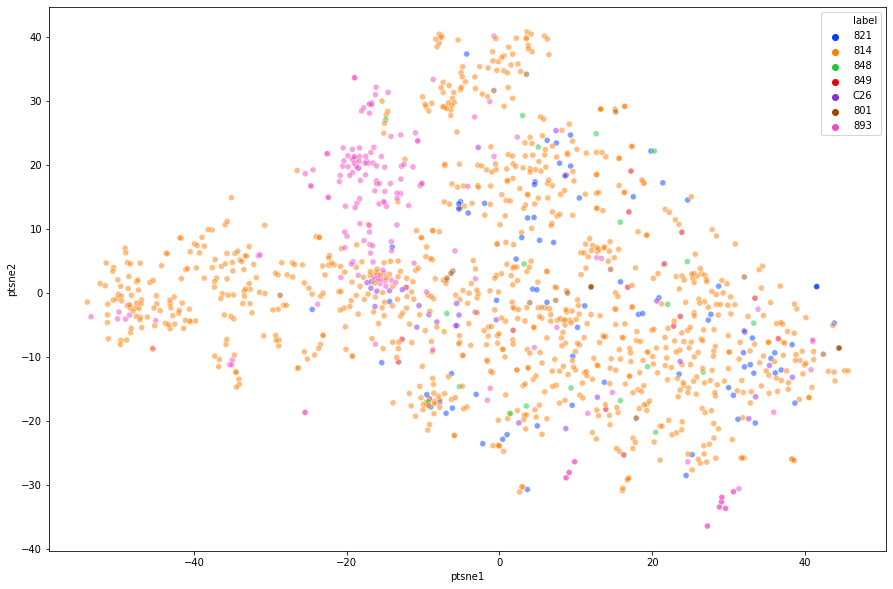

In [269]:
# plot
df = pd.DataFrame(stomach_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = dStomach_label
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(dStomach_label))),
    data=df,
    legend="full",
    alpha=0.5
)

### Breast without arraymap

#### source label

In [256]:
slabelfile = '/Users/bogao/DataFiles/new landscape/data/all_bands_source_label.pkl'
with open(slabelfile, 'rb') as fi:
    source_labels = pickle.load(fi)

In [262]:
RS = 1234
dBreast = np.maximum(data, 0)
dBreast = dBreast[(labels == 'Breast') & (source_labels != 'arraymap')]

dBreast_label = disease_labels[(labels == 'Breast') & (source_labels != 'arraymap')]

dBreast = dBreast[dBreast_label != 'None']
dBreast_label = dBreast_label[dBreast_label != 'None']
dBreast_label = pd.Series(dBreast_label).str[:4].values

unique_labels, unique_counts = np.unique(dBreast_label,return_counts=True)
unique_labels = unique_labels[unique_counts>10]
dBreast = dBreast[np.isin(dBreast_label, unique_labels)]
dBreast_label = dBreast_label[np.isin(dBreast_label, unique_labels)]

In [263]:
# PCA 50
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(dBreast)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.09975600242614746 seconds
Cumulative explained variation for 50 principal components: 0.5826719748752753


In [264]:
# TSNE
time_start = time.time()
breast_tsne = TSNE(random_state=RS).fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 8.294188976287842 seconds


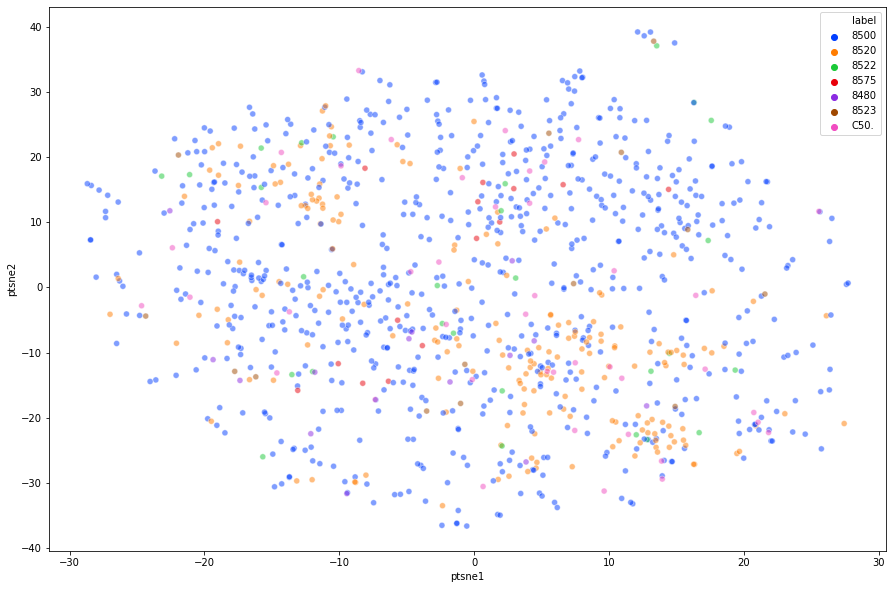

In [265]:
# plot
df = pd.DataFrame(breast_tsne, columns = ['ptsne1','ptsne2'])
df['label'] = dBreast_label
plt.figure(figsize=(15,10))
ax = sns.scatterplot(
    x="ptsne1", y="ptsne2",
    hue="label",
    palette=sns.color_palette("bright", len(set(dBreast_label))),
    data=df,
    legend="full",
    alpha=0.5
)

### Save feature matrix by disease

In [275]:
disease_names = ['Brain', 'Ovary', 'Breast', 'Kidney', 'Prostate', 'Skin', 'Colon', 'Liver', 'Lung', 'Stomach']
disease_data = [dBrain, dOvary, dBreast, dKidney, dProstate, dSkin, dColon, dLiver, dLung, dStomach]
disease_labels = [dBrain_label, dOvary_label, dBreast_label, dKidney_label, dProstate_label, dSkin_label, dColon_label, dLiver_label, dLung_label, dStomach_label]

In [273]:
for i in range(10):
    filepath = '/Users/bogao/DataFiles/new landscape/data/' + disease_names[i] + '.tsv'
    df = pd.DataFrame({''})

0
1
2
3
4
5
6
7
8
9


In [1]:
data.shape

NameError: name 'data' is not defined